In [1]:
import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import f_regression,SelectKBest
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import f1_score

In [2]:
train_data=pd.read_csv('train_COMPETITION_modified.csv')
test_data=pd.read_csv('test_COMPETITION.csv')

In [3]:
print('The Train data shape is ', train_data.shape)
print('The Test data shape is ',test_data.shape)

The Train data shape is  (14681, 44)
The Test data shape is  (5751, 43)


In [4]:
print('The null values in Train data columns is' , '\n', train_data.isnull().sum())

The null values in Train data columns is 
 ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0


In [5]:
print('The null values in Test data columns is' , '\n', test_data.isnull().sum())

The null values in Test data columns is 
 ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
s

### By checking the null values in train and test data we found it clean from null values 

### --------------------------------------------------------------------------------------------------------------------------------------

### by checking the service columns we found that two values in train data not found in test data 

In [6]:
test_data.service.unique()

array(['http', 'ftp_data', 'domain_u', 'smtp', 'pop_3', 'other', 'telnet',
       'eco_i', 'private', 'finger', 'echo', 'courier', 'ecr_i', 'Z39_50',
       'iso_tsap', 'netbios_ns', 'vmnet', 'kshell', 'ntp_u', 'rje',
       'http_443', 'ldap', 'daytime', 'csnet_ns', 'exec', 'systat',
       'imap4', 'mtp', 'ctf', 'discard', 'name', 'bgp', 'time', 'ssh',
       'urp_i', 'supdup', 'ftp', 'link', 'uucp', 'gopher', 'klogin',
       'uucp_path', 'pop_2', 'netbios_dgm', 'netstat', 'auth', 'nnsp',
       'sql_net', 'whois', 'sunrpc', 'netbios_ssn', 'X11', 'hostnames',
       'nntp', 'urh_i', 'efs', 'IRC', 'shell', 'printer', 'login',
       'remote_job', 'domain', 'red_i'], dtype=object)

In [7]:
train_data.service.unique()

array(['smtp', 'http', 'domain_u', 'telnet', 'ftp_data', 'eco_i',
       'private', 'urp_i', 'other', 'red_i', 'ftp', 'auth', 'nnsp',
       'Z39_50', 'domain', 'kshell', 'netstat', 'whois', 'systat',
       'imap4', 'ecr_i', 'klogin', 'discard', 'daytime', 'ssh', 'IRC',
       'uucp_path', 'hostnames', 'iso_tsap', 'name', 'sql_net', 'ctf',
       'finger', 'exec', 'sunrpc', 'netbios_ns', 'efs', 'uucp', 'courier',
       'csnet_ns', 'pop_3', 'login', 'ldap', 'netbios_ssn', 'ntp_u',
       'http_443', 'supdup', 'link', 'X11', 'gopher', 'vmnet', 'mtp',
       'netbios_dgm', 'bgp', 'time', 'nntp', 'echo', 'printer', 'shell',
       'urh_i', 'remote_job', 'pm_dump', 'rje', 'pop_2', 'tim_i'],
      dtype=object)

In [8]:
l=[]
k=[]
for i in range(len(train_data.service.unique())):
    if train_data.service.unique()[i] in test_data.service.unique():
        l.append( train_data.service.unique()[i])
    else:
        k.append(train_data.service.unique()[i])

In [9]:
k

['pm_dump', 'tim_i']

In [10]:
index_to_drop=list(train_data[(train_data['service']=='pm_dump')|(train_data['service']=='tim_i')].index)

In [11]:
index_to_drop

[4650, 9646, 9748]

In [12]:
train_data.drop(index_to_drop,axis=0,inplace=True)
train_data.reset_index(drop=True)

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,7060,0,tcp,smtp,SF,1129,327,0,0,0,...,1.00,0.00,0.14,0.02,0.00,0.04,0.0,0.01,21,0
1,22036,0,tcp,http,SF,242,2147,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
2,19555,0,tcp,http,SF,299,3991,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
3,11393,0,udp,domain_u,SF,43,133,0,0,0,...,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.00,21,0
4,22783,0,tcp,telnet,S0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.10,0.67,0.0,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14673,8562,0,tcp,smtp,SF,3873,337,0,0,0,...,0.83,0.03,0.01,0.01,0.00,0.00,0.0,0.00,21,0
14674,11680,0,tcp,smtp,SF,767,335,0,0,0,...,0.50,0.03,0.00,0.00,0.00,0.00,0.0,0.00,21,0
14675,1091,0,tcp,http,SF,162,19994,0,0,0,...,1.00,0.00,0.07,0.04,0.07,0.00,0.0,0.00,21,0
14676,2992,0,udp,domain_u,SF,44,80,0,0,0,...,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.00,20,0


### -------------------------------------------------------------------------------------------------------------------------

### By check the number of unique values in both train and test data we found that more than one column have only one value so we drop them to not affect the model and the ID columns becuase it is useless['urgent' ,'num_outbound_cmds','is_host_login','ID']

In [13]:
train_unique_values=pd.DataFrame(train_data.apply(lambda x: x.value_counts(dropna=False).size)).reset_index()
train_unique_values.columns = ['columns_name','unique_values']
train_unique_values[train_unique_values['unique_values']==1]

,columns_name,unique_values
9,urgent,1
20,num_outbound_cmds,1
21,is_host_login,1


In [14]:
#unique_values=pd.DataFrame(test_data.apply(lambda x:x.value_counts(dropna=False).size))
#unique_values.columns=['column_name','unique_value_in columns']
output_df = pd.DataFrame(test_data.apply(lambda x: x.value_counts(dropna=False).size)).reset_index()
output_df.columns = ['column_name', 'unique_values']
output_df[output_df['unique_values']==1]

,column_name,unique_values
7,land,1
20,num_outbound_cmds,1
21,is_host_login,1


In [15]:
train_data.drop(['urgent' ,'num_outbound_cmds','is_host_login','ID'],axis=1,inplace=True)
test_data.drop(['urgent' ,'num_outbound_cmds','is_host_login','ID'],axis=1,inplace=True)

### -------------------------------------------------------------------------------------------------------------------------

### split the train data into features and target

In [16]:
x=train_data.drop('Class',axis=1)
y=train_data['Class']

### ------------------------------------------------------------------------------------------------------------------------

## Encoder

In [17]:
encoder=BinaryEncoder()
x_train_binary_ec=encoder.fit_transform(x)

In [18]:
x_train_binary_ec

,duration,protocol_type_0,protocol_type_1,service_0,service_1,service_2,service_3,service_4,service_5,flag_0,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,0,1,0,0,0,0,0,1,0,...,138,1.00,0.00,0.14,0.02,0.00,0.04,0.0,0.01,21
1,0,0,1,0,0,0,0,1,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21
2,0,0,1,0,0,0,0,1,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21
3,0,1,0,0,0,0,0,1,1,0,...,254,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.00,21
4,0,0,1,0,0,0,1,0,0,0,...,3,0.14,0.19,0.05,0.00,0.10,0.67,0.0,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14676,0,0,1,0,0,0,0,0,1,0,...,156,0.83,0.03,0.01,0.01,0.00,0.00,0.0,0.00,21
14677,0,0,1,0,0,0,0,0,1,0,...,105,0.50,0.03,0.00,0.00,0.00,0.00,0.0,0.00,21
14678,0,0,1,0,0,0,0,1,0,0,...,255,1.00,0.00,0.07,0.04,0.07,0.00,0.0,0.00,21
14679,0,1,0,0,0,0,0,1,1,0,...,254,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.00,20


### --------------------------------------------------------------------------------------------------------------------

### scaling data

In [19]:
scaler=StandardScaler()
numerical_col=x.select_dtypes(include=['float64', 'int64']).columns
x_train_binary_ec[numerical_col]=scaler.fit_transform(x_train_binary_ec[numerical_col])

### -----------------------------------------------------------------------------------------------------------------------------

### Train,Test split

In [20]:
x_train1 , x_test1 , y_train1 , y_test1=train_test_split(x_train_binary_ec,y,test_size=0.2,random_state=42)

### -------------------------------------------------------------------------------------------------------------------------

### Logistic Regression model

In [21]:
x_train_binary_ec

,duration,protocol_type_0,protocol_type_1,service_0,service_1,service_2,service_3,service_4,service_5,flag_0,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,-0.115005,0,1,0,0,0,0,0,1,0,...,0.128060,0.997109,-0.426400,-0.015554,-0.101402,-0.595208,-0.487387,-0.365325,-0.323231,0.629334
1,-0.115005,0,1,0,0,0,0,1,0,0,...,1.177794,0.997109,-0.426400,-0.476635,-0.292196,-0.595208,-0.580471,-0.365325,-0.356154,0.629334
2,-0.115005,0,1,0,0,0,0,1,0,0,...,1.177794,0.997109,-0.426400,-0.476635,-0.292196,-0.595208,-0.580471,-0.365325,-0.356154,0.629334
3,-0.115005,1,0,0,0,0,0,1,1,0,...,1.168822,0.997109,-0.372018,-0.476635,-0.292196,-0.595208,-0.580471,-0.365325,-0.356154,0.629334
4,-0.115005,0,1,0,0,0,1,0,0,0,...,-1.083171,-0.927487,0.606864,-0.311963,-0.292196,-0.362286,0.978697,-0.365325,-0.356154,-6.981546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14676,-0.115005,0,1,0,0,0,0,0,1,0,...,0.289558,0.616666,-0.263253,-0.443700,-0.196799,-0.595208,-0.580471,-0.365325,-0.356154,0.629334
14677,-0.115005,0,1,0,0,0,0,0,1,0,...,-0.168018,-0.121842,-0.263253,-0.476635,-0.292196,-0.595208,-0.580471,-0.365325,-0.356154,0.629334
14678,-0.115005,0,1,0,0,0,0,1,0,0,...,1.177794,0.997109,-0.426400,-0.246094,0.089392,-0.432162,-0.580471,-0.365325,-0.356154,0.629334
14679,-0.115005,1,0,0,0,0,0,1,1,0,...,1.168822,0.997109,-0.372018,-0.476635,-0.292196,-0.595208,-0.580471,-0.365325,-0.356154,0.181636


In [22]:
LR=LogisticRegression()
LR.fit(x_train1,y_train1)

LogisticRegression()

In [23]:
y_pred_LR=LR.predict(x_test1)

In [24]:
f1_score(y_pred_LR,y_test1)

0.985973597359736

In [26]:
model_output=LR.predict(test_binary_ec)
pd.DataFrame(model_output, columns=['class']).to_csv('output_paula_LR_2.csv',index=False)

### 2-Random Forest

In [25]:
rf1=RandomForestClassifier(n_estimators=100,random_state=42)

In [26]:
rf1.fit(x_train1,y_train1)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf=rf1.predict(x_test1)

In [28]:
accuracy_score(y_pred_rf,y_test1)

0.9996594005449592

In [109]:
f1_score(y_pred_rf,y_test1)

0.9995862639635912

### 3- KNN

In [84]:
knn1=KNeighborsClassifier(n_neighbors=5)

In [85]:
knn1.fit(x_train1,y_train1)
y_pred_knn1=knn1.predict(x_test1)

In [86]:
accuracy_score(y_pred_knn1,y_test1)

0.9965940054495913

### 4-xgboost

In [99]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=1000, learning_rate=0.05)

In [100]:
xgb_model.fit(x_train1,y_train1)
y_pred_xgb=xgb_model.predict(x_test1)

In [101]:
accuracy_score(y_pred_xgb,y_test1)

0.9993188010899182

### Feature selection

In [29]:
sfs=SequentialFeatureSelector(LR,k_features=39,forward=True,floating=True,n_jobs=-1,cv=5)
sfs.fit(x_train1,y_train1)

SequentialFeatureSelector(estimator=LogisticRegression(), floating=True,
                          k_features=(39, 39), n_jobs=-1, scoring='accuracy')

In [30]:
sfs.k_feature_names_

('duration',
 'protocol_type_0',
 'service_0',
 'service_1',
 'service_2',
 'service_3',
 'service_4',
 'service_5',
 'flag_0',
 'flag_2',
 'src_bytes',
 'dst_bytes',
 'land',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level')

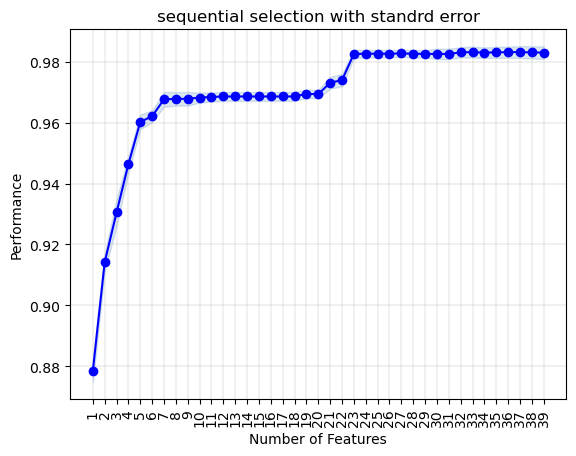

In [31]:
plot_sfs(sfs.get_metric_dict(),kind='std_dev')
plt.title('sequential selection with standrd error')
plt.grid(linewidth=0.3, alpha=0.9)
plt.xticks(rotation=90)
plt.show()

In [47]:
sfs=SequentialFeatureSelector(LR,k_features=23,forward=True,floating=True,n_jobs=-1,cv=5)
sfs.fit(x_train1,y_train1)

SequentialFeatureSelector(estimator=LogisticRegression(), floating=True,
                          k_features=(23, 23), n_jobs=-1, scoring='accuracy')

In [49]:
sfs.k_feature_names_

('protocol_type_1',
 'service_0',
 'service_1',
 'service_2',
 'service_3',
 'flag_1',
 'src_bytes',
 'dst_bytes',
 'land',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'same_srv_rate',
 'diff_srv_rate',
 'level')

In [50]:
x_train_binary_ec_sfs=x_train_binary_ec[['protocol_type_1',
 'service_0',
 'service_1',
 'service_2',
 'service_3',
 'flag_1',
 'src_bytes',
 'dst_bytes',
 'land',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'same_srv_rate',
 'diff_srv_rate',
 'level']]

### --------------------------------------------------------------------------------------------------------------------

### spliting after feature selection


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_train_binary_ec_sfs,y,test_size=0.2,random_state=42)

### --------------------------------------------------------------------------------------------------------

# Machine Learning models

### 1-KNN

In [52]:
knn=KNeighborsClassifier(n_neighbors=5)

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn=knn.predict(x_test)

In [55]:
accuracy_score(y_pred_knn,y_test)

0.9853542234332425

### 2-Logistics Regression

In [56]:
LR.fit(x_train,y_train)


LogisticRegression()

In [57]:
y_pred_LR_sfs=LR.predict(x_test)

In [58]:
accuracy_score(y_pred_LR_sfs,y_test)

0.9669618528610354

In [59]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(11742, 23) (11742,) (2936, 23) (2936,)


### 3-Random forest 

In [60]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred_rf_sfs=rf.predict(x_test)

In [62]:
accuracy_score(y_pred_rf_sfs,y_test)

0.9962534059945504

### 4- XGboost

In [102]:
xgb_model_1=xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=1000, learning_rate=0.05)

In [103]:
xgb_model_1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [104]:
y_pred_xgb_sfs=xgb_model_1.predict(x_test)

In [107]:
accuracy_score(y_pred_xgb_sfs,y_test,)

0.997275204359673

In [108]:
f1_score(y_pred_xgb_sfs,y_test)

0.9966859983429991

### -------------------------------------------------------------------------------------------------------------------------

### we find that the highest accuracy score is random fores before feature selection

In [25]:
test_binary_ec=encoder.fit_transform(test_data)
numerical_col=test_data.select_dtypes(include=['float64', 'int64']).columns
test_binary_ec[numerical_col]=scaler.fit_transform(test_binary_ec[numerical_col])

In [70]:

model_output=rf1.predict(test_binary_ec)
pd.DataFrame(model_output, columns=['class']).to_csv('output_paula_random_forest.csv',index=False)

In [46]:
test_binary_ec

,duration,protocol_type_0,protocol_type_1,service_0,service_1,service_2,service_3,service_4,service_5,flag_0,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,-0.114506,0,1,0,0,0,0,0,1,0,...,1.125647,1.099286,-0.450174,-0.189245,-0.194375,-0.645482,-0.630330,2.763095,-0.170723,0.662682
1,-0.114506,0,1,0,0,0,0,1,0,0,...,-0.680797,-0.397319,-0.085474,0.589259,0.147790,-0.645482,-0.630330,-0.401214,-0.385733,0.236243
2,-0.114506,1,0,0,0,0,0,1,1,0,...,1.298121,1.099286,-0.450174,-0.481185,-0.279917,-0.645482,-0.630330,-0.401214,-0.385733,0.662682
3,-0.114506,0,1,0,0,0,0,0,1,0,...,1.298121,1.099286,-0.450174,-0.481185,-0.194375,-0.645482,-0.630330,-0.401214,-0.385733,0.662682
4,-0.114506,0,1,0,0,0,1,0,0,0,...,0.490214,0.652538,1.633824,0.167569,-0.108834,-0.645482,-0.630330,-0.401214,-0.385733,0.662682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,-0.114506,0,1,0,0,1,0,0,1,0,...,-0.816961,-0.933416,-0.189674,-0.481185,-0.279917,1.594177,1.607922,-0.401214,-0.385733,0.236243
5747,-0.114506,0,1,0,0,0,1,0,0,0,...,0.081722,-0.173945,-0.345974,-0.448747,-0.108834,-0.645482,-0.630330,-0.401214,-0.385733,0.662682
5748,-0.114506,0,1,0,0,0,0,0,1,0,...,-0.789728,-0.911079,-0.189674,-0.481185,-0.279917,1.594177,1.607922,-0.401214,-0.385733,-0.190196
5749,-0.114506,0,1,0,0,0,0,0,1,0,...,1.298121,1.099286,-0.450174,-0.481185,-0.279917,-0.645482,-0.630330,-0.401214,-0.385733,0.662682


### using knn before feature selection


In [87]:
model_output=knn1.predict(test_binary_ec)
pd.DataFrame(model_output, columns=['class']).to_csv('output_paula_knn.csv',index=False)